<h1 align=center><font size = 5>Project title : Maclanren's Pub</font></h1>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data & Methodology](#methodology)
* [Exploring and modeling](#results)
* [Data & Methodology-2](#methodology-2)
* [Exploring and modeling-2](#results-2)
* [Data & Methodology-3](#methodology-3)
* [Exploring and modeling-3](#results-3)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Many investors choose to invest into pubs, bars…, generally in liquor stores, mainly because the majority of the population of the United States spend their free time with their friends and loved ones consuming alcohol. But those investments cannot always be a success. It can involve different features such as the population, the rent, alcohol consumption. In fact, I found an investor who’s ready to open a pub with the name ‘Maclaren’s Pub’ in the state of Iowa.
So how can we make sure that our investment doesn't turn into a big loss ?
Where do we have to open our new pub ?

## Data & Methodology <a name="methodology"></a>

To solve this problem, as a data scientist my objective is to locate the best place with higher sales revenue, higher population and lowest rent value in order to get profitable business with lowest investment value.

First We import python packages that we will use treat our data

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The first dataset is csv file represent liquors Sale in the Iowa State - 2019.

This filtered view contains the spirits purchase information of Iowa Class “E” liquor licensees by product and date of purchase for calendar year 2019. The dataset can be used to analyze total spirits sales in Iowa of individual products at the store level to get an idea on alcohol consumption and Sales.

In [65]:
# 1. Dataset for liquor consumption in the state of Iowa 2019
liq=pd.read_csv('2019_Iowa_Liquor_Sales.csv')
liq.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16681900011,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,1.26
1,INV-16681900027,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,89191,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,1.58
2,INV-16681900018,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,8824,Lauder's,24,375,3.21,4.82,24,115.68,9.0,2.37
3,INV-16685400036,01/02/2019,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,35917,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,3.17
4,INV-16690300035,01/02/2019,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,36304,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,2.37


In [66]:
# We see the types of our data
liq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380345 entries, 0 to 2380344
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [67]:
# We'll drop rows with NaN Store Number and City
liq=liq[liq['Store Number'].notna()]
liq=liq[liq['City'].notna()]
pd.isna(liq['City']).value_counts()

False    2375581
Name: City, dtype: int64

In [68]:
# Now let's convert column types
liq[['Store Number']]=liq[['Store Number']].astype('int64',copy=False)
liq[['Date']] = liq[['Date']].apply(pd.to_datetime)
liq.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                        float64
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [69]:
liq.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16681900011,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,1.26
1,INV-16681900027,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,89191,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,1.58
2,INV-16681900018,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,8824,Lauder's,24,375,3.21,4.82,24,115.68,9.0,2.37
3,INV-16685400036,2019-01-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,35917,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,3.17
4,INV-16690300035,2019-01-02,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,36304,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,2.37


Let's a column to our dataset that will calculate the revenu of Sale Operation made.

Revenu = Sales price - (Botlles sold * State Bottle Cost by the vendor)

This Column represent our target variable. Based on the revenu we can judge wich City with the highest revenu on alcohol consumption.

In [70]:
liq['Revenu']=liq['Sale (Dollars)']-liq['Bottles Sold']*liq['State Bottle Cost']
liq.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenu
0,INV-16681900011,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,1.26,74.88
1,INV-16681900027,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,1.58,69.00
2,INV-16681900018,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Lauder's,24,375,3.21,4.82,24,115.68,9.0,2.37,38.64
3,INV-16685400036,2019-01-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,3.17,25.08
4,INV-16690300035,2019-01-02,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,2.37,22.32


Let's drop useless variables that cannot affect our analysis

In [71]:
liq.drop(['County Number','Category','Vendor Number','Invoice/Item Number','Item Number','Volume Sold (Gallons)'],axis=1,inplace=True)
liq.head()

,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenu
0,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Imported Brandies,MOET HENNESSY USA,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,74.88
1,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Mixto Tequila,PROXIMO,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,69.00
2,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Scotch Whiskies,SAZERAC NORTH AMERICA,Lauder's,24,375,3.21,4.82,24,115.68,9.0,38.64
3,2019-01-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,DUBUQUE,American Vodkas,Laird & Company,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,25.08
4,2019-01-02,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,POLK,American Vodkas,LUXCO INC,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,22.32


After having the revenu value on each operation. We should add the Population variable.

This dataset is csv file that contains each city population in the state of Iowa from 2010 to 2018.

In [72]:
# Population dataset
pop=pd.read_csv('Total_City_Population_by_Year.csv')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIPS           29332 non-null  int64  
 1   City           29332 non-null  object 
 2   Year           29332 non-null  object 
 3   Population     29331 non-null  float64
 4   Primary Point  29168 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


In [73]:
# Let's take the latest Population data
pop=pop[pop['Year'].str.contains('2018')]
pop.head()

,FIPS,City,Year,Population,Primary Point
10,1959645,Orleans,July 01 2018,586.0,NaN
65,1930045,Garwin,July 01 2018,496.0,POINT (-92.6790893 42.0934589)
104,1950700,Mechanicsville,July 01 2018,1130.0,POINT (-91.2532455 41.905572)
136,1939765,Johnston,July 01 2018,22041.0,POINT (-93.7172578 41.6856012)
257,1982065,Walnut,July 01 2018,774.0,POINT (-95.2204992 41.4884727)


In [74]:
pop=pop[['City','Population']]
pop.head()

,City,Population
10,Orleans,586.0
65,Garwin,496.0
104,Mechanicsville,1130.0
136,Johnston,22041.0
257,Walnut,774.0


After filtering our data to get the average population on every city, let's add it to our first dataset

In [75]:
# Let's join the two dataset to get the population on every city of the store this column will be considered with city analysis
liq=liq.join(pop.set_index('City'),on='City')
liq.head()

,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenu,Population
0,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Imported Brandies,MOET HENNESSY USA,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,74.88,75696.0
1,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Mixto Tequila,PROXIMO,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,69.00,75696.0
2,2019-01-02,5286,Sauce,"108, College",Iowa City,52240.0,NaN,JOHNSON,Scotch Whiskies,SAZERAC NORTH AMERICA,Lauder's,24,375,3.21,4.82,24,115.68,9.0,38.64,75696.0
3,2019-01-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,DUBUQUE,American Vodkas,Laird & Company,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,25.08,57975.0
4,2019-01-02,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,POLK,American Vodkas,LUXCO INC,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,22.32,43929.0


In [76]:
# Let's check how many cities with NaN population
liq['Population'].isna().value_counts()

False    2354027
True       21554
Name: Population, dtype: int64

In [77]:
# We should affect the average population on every city.
# The main cause for information loss is the difference between string values 
mpop=liq[liq['Population'].isna()]

In [78]:
mpop['City'].value_counts()

DeWitt             5244
ClearLake          4077
Lemars             2360
Mt Pleasant        2106
Leclaire           1450
St Ansgar          1357
MUSCATINE           966
Jewell              660
St Lucas            632
Arnold's Park       549
Amana               523
Grand Mounds        373
Washburn            272
Otumwa              228
St Charles          187
Saint Ansgar        166
LoneTree            147
Pleasant Valley     144
SAGEVILLE           113
Name: City, dtype: int64

In [79]:
# Let's affect the missing population values
popmis={'City':['DeWitt','ClearLake','Lemars','Mt Pleasant','Leclaire','St Ansgar','MUSCATINE','Arnold\'s Park','Jewell','St Lucas','Amana','Grand Mounds','Otumwa','Washburn','St Charles','LoneTree','Saint Ansgar','Pleasant Valley','SAGEVILLE'],
        'Popul':[5322,7777,9826,8668,3765,1107,22886,1126,1215,143,442,642,25023,2129,653,1300,1107,34936.0,122]}
popmiss=pd.DataFrame(popmis)
popmiss['Popul']=popmiss['Popul'].astype('float64',copy=False)
liq=liq.join(popmiss.set_index('City'),on='City')
popmiss.head()

,City,Popul
0,DeWitt,5322.0
1,ClearLake,7777.0
2,Lemars,9826.0
3,Mt Pleasant,8668.0
4,Leclaire,3765.0


In [80]:
liq['Population'].fillna(liq['Popul'],axis=0,inplace=True)
liq['Population'].isna().value_counts()

False    2375581
Name: Population, dtype: int64

## Exploring and modeling <a name="results"></a>

#### Now that we cleaned our data, we get to the Exploratory Data Analysis

In [81]:
liq.drop('Popul',axis=1,inplace=True)

In [82]:
liq.describe()

,Store Number,Zip Code,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenu,Population
count,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06
mean,3.904240e+03,5.126670e+04,1.242675e+01,8.765395e+02,1.034365e+01,1.551788e+01,1.128143e+01,1.467514e+02,9.371324e+00,4.892877e+01,5.430751e+04
std,1.139063e+03,9.881870e+02,8.110573e+00,5.214043e+02,8.571005e+00,1.285871e+01,3.132145e+01,4.872925e+02,3.824600e+01,1.631243e+02,6.242333e+04
min,2.106000e+03,5.000200e+04,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,2.000000e-02,-1.305000e+03,6.900000e+01
25%,2.624000e+03,5.031600e+04,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.375000e+01,1.500000e+00,1.125000e+01,6.004000e+03
50%,3.952000e+03,5.110300e+04,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.536000e+01,4.800000e+00,2.508000e+01,2.512100e+04
75%,4.972000e+03,5.230200e+04,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,1.050000e+01,4.956000e+01,7.569600e+04
max,9.042000e+03,5.722200e+04,4.800000e+01,6.000000e+03,1.749120e+03,2.623680e+03,6.750000e+03,7.843500e+04,1.181250e+04,2.614500e+04,2.159940e+05


In [83]:
liq.corr()

,Store Number,Zip Code,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenu,Population
Store Number,1.000000,0.004619,0.124731,-0.104114,-0.079349,-0.079329,0.002121,-0.039548,-0.031500,-0.039475,-0.108416
Zip Code,0.004619,1.000000,0.027999,-0.016901,-0.023530,-0.023534,-0.003784,-0.011548,-0.006471,-0.011568,-0.070763
Pack,0.124731,0.027999,1.000000,-0.566561,-0.362572,-0.362536,0.178772,-0.048069,-0.051644,-0.047840,0.081023
Bottle Volume (ml),-0.104114,-0.016901,-0.566561,1.000000,0.261043,0.260997,-0.031668,0.078754,0.133931,0.078457,-0.102540
State Bottle Cost,-0.079349,-0.023530,-0.362572,0.261043,1.000000,0.999831,-0.070285,0.115710,0.006551,0.114599,0.002004
State Bottle Retail,-0.079329,-0.023534,-0.362536,0.260997,0.999831,1.000000,-0.070273,0.115696,0.006553,0.114587,0.001991
Bottles Sold,0.002121,-0.003784,0.178772,-0.031668,-0.070285,-0.070273,1.000000,0.802434,0.849534,0.802422,0.073986
Sale (Dollars),-0.039548,-0.011548,-0.048069,0.078754,0.115710,0.115696,0.802434,1.000000,0.837525,0.999175,0.054224
Volume Sold (Liters),-0.031500,-0.006471,-0.051644,0.133931,0.006551,0.006553,0.849534,0.837525,1.000000,0.837532,0.029236
Revenu,-0.039475,-0.011568,-0.047840,0.078457,0.114599,0.114587,0.802422,0.999175,0.837532,1.000000,0.054049


We plot the correlation heatmap to see the relationship between the variables

(0.0, 11.0)

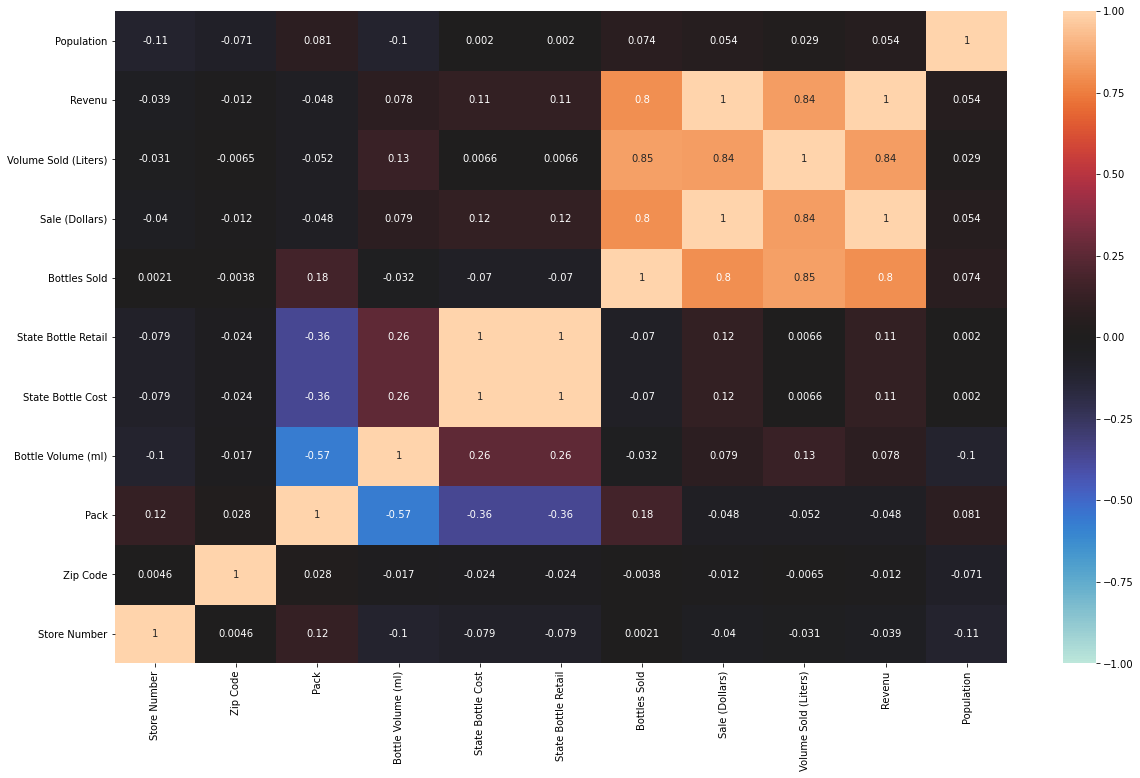

In [84]:
plt.figure(figsize=(20, 12))
ax=sns.heatmap(liq.corr(),annot = True,vmin=-1, vmax=1, center= 0)
ax.set_ylim([0,11])

We see that there's a correlation between Revenu and Volum Sold (liters) and absolutely no correlation between the revenu and the population.

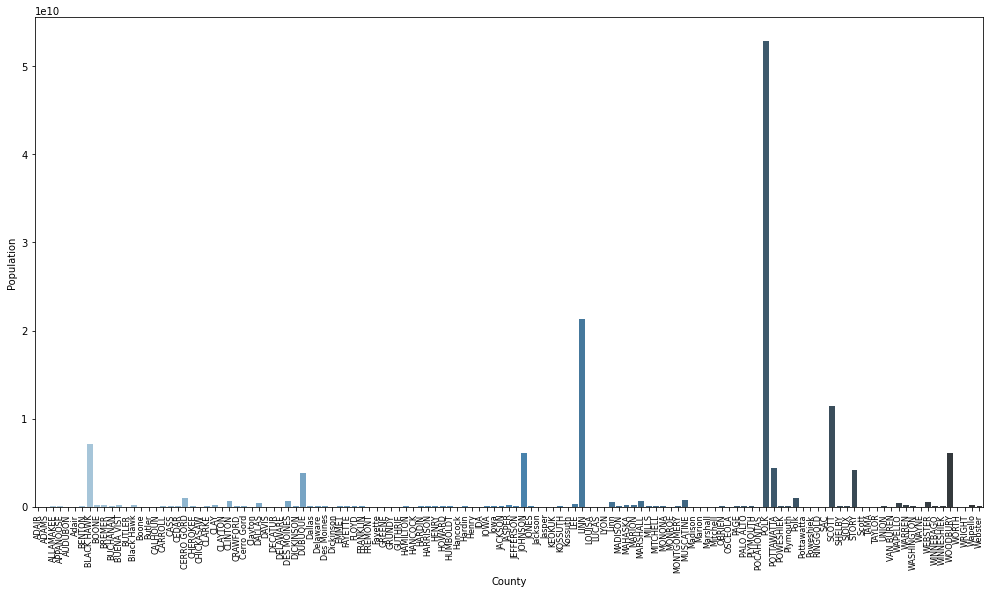

In [85]:
# Let's the population variation in every county
bard=liq.groupby('County',as_index=False,sort=True)['Population'].sum()
plt.figure(figsize=(17, 9))
sns.barplot(x=bard['County'], y=bard['Population'], data=bard,palette="Blues_d",color="salmon")
plt.xticks(fontsize=8,rotation=90)
plt.show()

After getting the population and the revenu variables. We should reduce our focus area.
For significant EDA let's group our datasets.

First we group dataset for each store to get the total revenu made by every store in the year of 2019.

In [86]:
# We should group data for every store to sum the revenue in the year 2019
d = {'Population':'Total Population', 'Revenu':'Total Revenu'}
obs=liq.groupby('Store Number',as_index=False).agg({'City':'first','County':'first','Population':'mean', 'Revenu':'sum','Volume Sold (Liters)':'sum'}).rename(columns=d)
obs.head()

,Store Number,City,County,Total Population,Total Revenu,Volume Sold (Liters)
0,2106,Cedar Falls,BLACK HAWK,40576.0,407656.47,78877.94
1,2113,Gowrie,WEBSTER,967.0,26326.61,5593.06
2,2130,Waterloo,BLACK HAWK,67722.0,391442.99,68236.80
3,2178,Waukon,ALLAMAKEE,3679.0,109966.09,23373.24
4,2190,Des Moines,POLK,215994.0,708340.38,86398.33


Now we group our dataset on each city, county, population, the average revenu made by every store in the city and the average volume consumption.

In [87]:
# Now we group the data by cities with county, Population, Total Population, Total Revenu and Volume Sold
nobs=obs.groupby('City',as_index=False).agg({'County':'first','Total Population':'mean', 'Total Revenu':'mean','Volume Sold (Liters)':'mean'})
nobs.head()

,City,County,Total Population,Total Revenu,Volume Sold (Liters)
0,Ackley,HARDIN,1509.0,9374.7800,2258.926667
1,Adair,ADAIR,706.0,10293.0450,1863.610000
2,Adel,DALLAS,4926.0,45139.7225,9176.567500
3,Afton,UNION,819.0,11818.8200,2868.450000
4,Akron,PLYMOUTH,1467.0,12263.9800,2820.140000


In [88]:
nobs['County'].value_counts()

LINN          14
POLK          12
DALLAS        10
JOHNSON       10
SCOTT          9
              ..
Black Hawk     1
Plymouth       1
Adair          1
JEFFERSON      1
CLAY           1
Name: County, Length: 119, dtype: int64

Let's plot our dataset and see the relationship between the variables

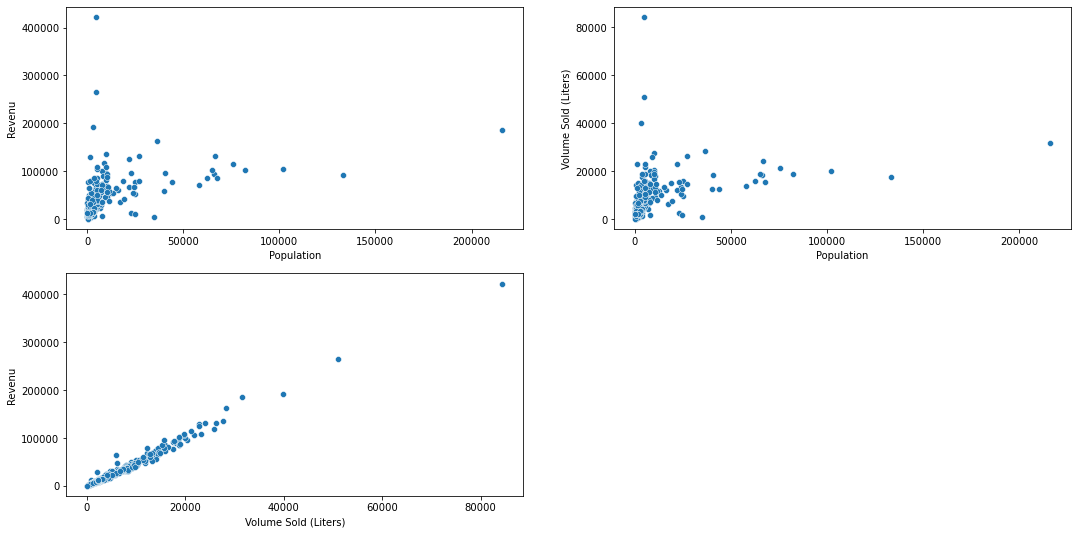

In [89]:
# Let's plot our new dataset
plt.figure(figsize=(18, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Volume Sold (Liters)'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Volume Sold (Liters)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=nobs['Volume Sold (Liters)'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Revenu')
plt.show()

We see that our data have a little bit of noise. We can use DBSCAN clustering to eliminate the noise in our datasets.
The noise in our dataset or outliers represent unlogical or useless data that could not help us to cluster our data. 

First we should scale our data.

In [90]:
# We should check again if our data is clean
nobs['Total Population'].isna().value_counts()

False    429
Name: Total Population, dtype: int64

In [91]:
# From the first plot we see that our data contains a lot of noise. Let's eliminate with DBSCAN clustring algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(nobs[['Total Population','Volume Sold (Liters)','Total Revenu']])
X_scaled

array([[-0.25754604, -0.57126089, -0.58645571],
       [-0.30583212, -0.62560477, -0.5618125 ],
       [-0.0520746 ,  0.37970188,  0.37335749],
       ...,
       [-0.26428083,  0.06004089, -0.02302017],
       [-0.26319845, -0.561441  , -0.52008746],
       [-0.34281338, -0.56491897, -0.52561287]])

In [92]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 2)
c = dbscan.fit_predict(X_scaled)

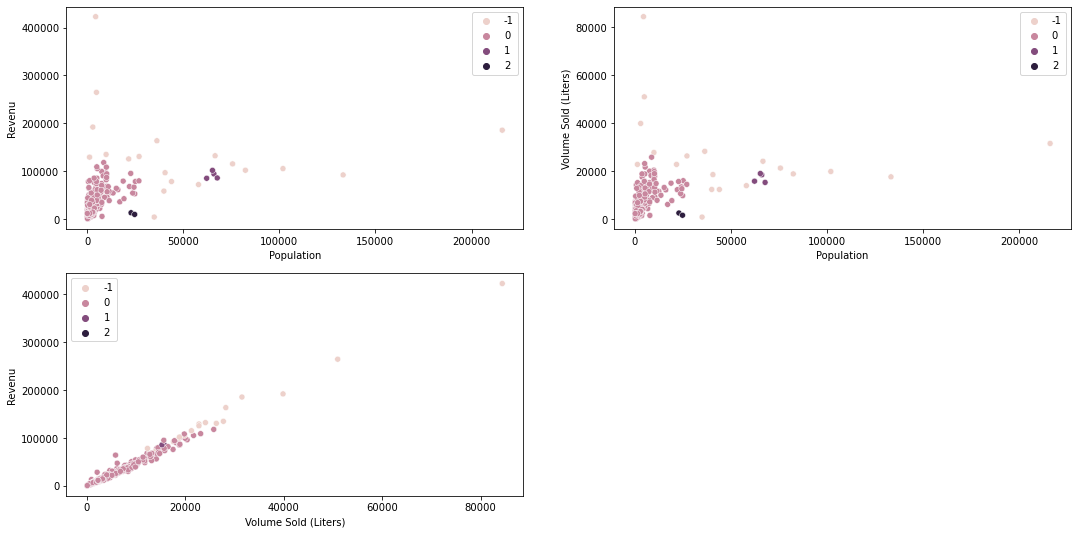

In [93]:
# Let's plot our clustering result
plt.figure(figsize=(18, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Total Revenu'],data=nobs,hue=c)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Volume Sold (Liters)'],data=nobs,hue=c)
plt.xlabel('Population')
plt.ylabel('Volume Sold (Liters)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=nobs['Volume Sold (Liters)'],y=nobs['Total Revenu'],data=nobs,hue=c)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Revenu')
plt.show()

As you can see our data is mostely grouped in the cluster 0

In [94]:
nobs['Cluster']=c
nobs['Cluster'].isna().value_counts()

False    429
Name: Cluster, dtype: int64

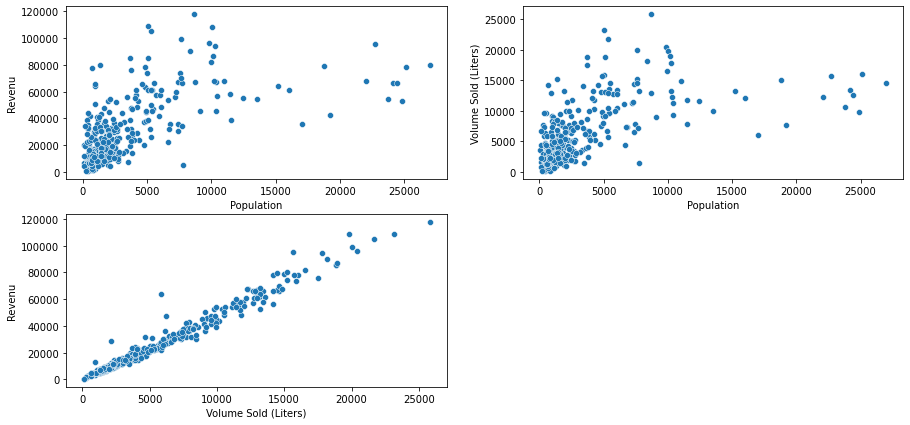

In [95]:
# Eliminate the noise and plot our new dataset
nobs=nobs[nobs['Cluster']==0]
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Volume Sold (Liters)'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Volume Sold (Liters)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=nobs['Volume Sold (Liters)'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Revenu')
plt.show()

In [96]:
# Now we use K-means clustering to chose our cluster to study
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(nobs[['Total Population','Total Revenu']])
X2_scaled

array([[-3.29904711e-01, -7.13996522e-01],
       [-5.19478914e-01, -6.73945306e-01],
       [ 4.76789005e-01,  8.45933835e-01],
       [-4.92801598e-01, -6.07396821e-01],
       [-3.39820174e-01, -5.87980640e-01],
       [-5.27033553e-01, -9.92710052e-01],
       [ 1.90184916e-01,  2.73116695e-01],
       [-5.68347981e-01, -7.92984561e-01],
       [-5.20423244e-01, -9.42528758e-01],
       [-5.10507781e-01, -5.64405437e-01],
       [ 5.92705486e-01,  1.55934549e+00],
       [-4.54320159e-01, -6.93133374e-01],
       [-2.31222249e-01, -8.95412156e-01],
       [-3.89397487e-01, -9.13431093e-01],
       [ 3.74818345e+00,  2.33123976e+00],
       [-5.81804680e-01, -2.64374279e-01],
       [ 6.16785895e-01,  1.76764081e+00],
       [-4.71554178e-01, -4.63258849e-01],
       [-5.53710869e-01, -3.92442739e-01],
       [-4.35905729e-01, -9.07245009e-01],
       [-5.91247978e-01, -8.82646353e-01],
       [-4.88079949e-01, -5.26391533e-01],
       [-4.20324287e-01, -8.34259430e-01],
       [-2.

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2).fit(X2_scaled)
c2 = kmeans.fit_predict(X2_scaled)

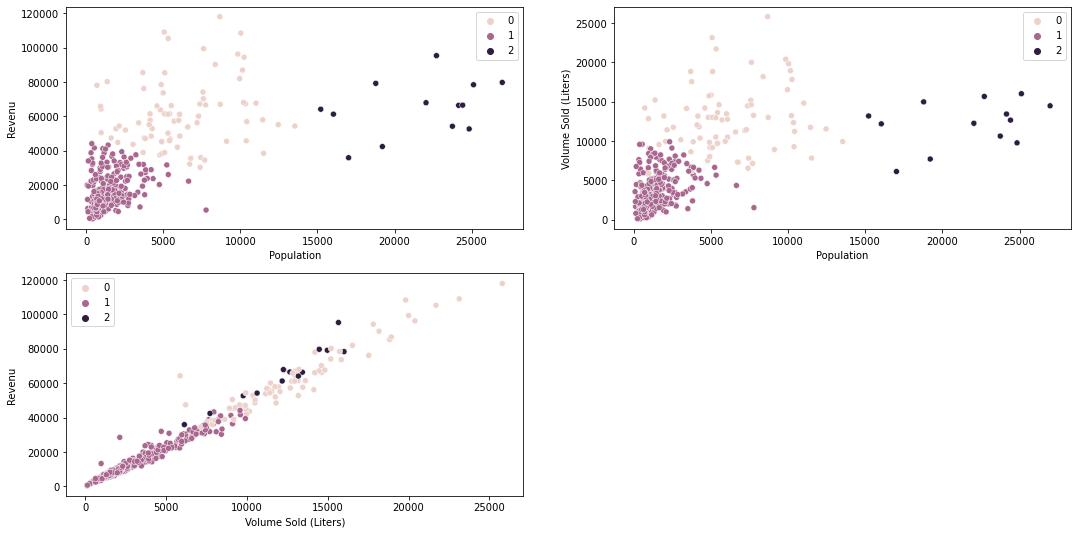

In [98]:
# Let's plot our k-means clustering result
plt.figure(figsize=(18, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Total Revenu'],data=nobs,hue=c2)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Volume Sold (Liters)'],data=nobs,hue=c2)
plt.xlabel('Population')
plt.ylabel('Volume Sold (Liters)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=nobs['Volume Sold (Liters)'],y=nobs['Total Revenu'],data=nobs,hue=c2)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Revenu')
plt.show()

In [99]:
nobs['Cluster']=c2
nobs.head()

,City,County,Total Population,Total Revenu,Volume Sold (Liters),Cluster
0,Ackley,HARDIN,1509.0,9374.7800,2258.926667,1
1,Adair,ADAIR,706.0,10293.0450,1863.610000,1
2,Adel,DALLAS,4926.0,45139.7225,9176.567500,0
3,Afton,UNION,819.0,11818.8200,2868.450000,1
4,Akron,PLYMOUTH,1467.0,12263.9800,2820.140000,1


#### Now we should chose our cluster.
As we see there's 3 cluster in our dataset
<ol>
    <li>The first one k=0 interpertation : Cities with low and medium population and high revenu on liquor consumption</li>
    <li>The second one k=1 interpertation : Cities with low population and low revenu on liquor consumption</li>
    <li>The first one k=2 interpertation : Cities with high population and medium revenu on liquor consumption</li>
</ol>
The choice of the cluster will help us chose the best place to open our pub. From the third plot the best cluster to chose is k=0 Cities with low population and low revenu on liquor consumption. Because most of the population of this cluster had the highest Revenu and Liquor Consumption.



In [100]:
nobs=nobs[nobs['Cluster']==0]
nobs.shape

(77, 6)

## Data & Methodology 2 <a name="methodology-2"></a>

https://www.rentdata.org/states/iowa/2019 : This dataset give us an idea on the average rent on every county based on the population of the state of Iowa . With dataset we could chose the best cluster and also predict the cities with the lowest rent value.

In [101]:
from bs4 import BeautifulSoup
import requests

In [102]:
url="https://www.rentdata.org/states/iowa/2019"
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

In [103]:
table = soup.find("table", attrs={"id": "state_table"})
table_data = table.find_all("tr") 
heading = []
for th in table_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    heading.append(th.text.replace('\n', ' ').strip())

heading # print the heading

['County', '0 BR', '1 BR', '2 BR', '3 BR', '4 BR', 'Est. Population']

In [104]:
n=len(heading)
data={}
data[heading[0]]=[]
data[heading[1]]=[]
data[heading[2]]=[]
data[heading[3]]=[]
data[heading[4]]=[]
data[heading[5]]=[]
data[heading[6]]=[]
for tr in table_data :
    for td,i in zip(tr.find_all("td"),range(n)) :
        data[heading[i]].append(td.text.replace('\n', ' ').strip())
data

{'County': ['Adair County',
  'Adams County',
  'Allamakee County',
  'Appanoose County',
  'Audubon County',
  'Benton County Metro',
  'Black Hawk County Metro',
  'Boone County',
  'Bremer County Metro',
  'Buchanan County',
  'Buena Vista County',
  'Butler County',
  'Calhoun County',
  'Carroll County',
  'Cass County',
  'Cedar County',
  'Cerro Gordo County',
  'Cherokee County',
  'Chickasaw County',
  'Clarke County',
  'Clay County',
  'Clayton County',
  'Clinton County',
  'Crawford County',
  'Dallas County Metro',
  'Davis County',
  'Decatur County',
  'Delaware County',
  'Des Moines County',
  'Dickinson County',
  'Dubuque County Metro',
  'Emmet County',
  'Fayette County',
  'Floyd County',
  'Franklin County',
  'Fremont County',
  'Greene County',
  'Grundy County Metro',
  'Guthrie County Metro',
  'Hamilton County',
  'Hancock County',
  'Hardin County',
  'Harrison County Metro',
  'Henry County',
  'Howard County',
  'Humboldt County',
  'Ida County',
  'Iowa

In [105]:
rentdata=pd.DataFrame(data)
rentdata.head()

,County,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population
0,Adair County,$481,$502,$664,$877,$947,"7,682"
1,Adams County,$481,$517,$664,$960,"$1,163","4,029"
2,Allamakee County,$481,$506,$664,$865,$977,"14,330"
3,Appanoose County,$481,$502,$664,$840,$911,"12,887"
4,Audubon County,$481,$502,$664,$863,$898,"6,119"


In [106]:
rentdata.rename(columns={'0 BR':'0','1 BR':'1','2 BR':'2','3 BR':'3','4 BR':'4','Est. Population':'Population'},inplace=True)
rentdata.dtypes

County        object
0             object
1             object
2             object
3             object
4             object
Population    object
dtype: object

In [107]:
rentdata['0']=rentdata['0'].str.replace(r'\D', '')
rentdata['1']=rentdata['1'].str.replace(r'\D', '')
rentdata['2']=rentdata['2'].str.replace(r'\D', '')
rentdata['3']=rentdata['3'].str.replace(r'\D', '')
rentdata['4']=rentdata['4'].str.replace(r'\D', '')
rentdata['Population']=rentdata['Population'].str.replace(r'\D', '')
rentdata['County']=rentdata['County'].str.replace(' County', '')
rentdata.head()

<ipython-input-107-0f238ff5034c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['0']=rentdata['0'].str.replace(r'\D', '')
<ipython-input-107-0f238ff5034c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['1']=rentdata['1'].str.replace(r'\D', '')
<ipython-input-107-0f238ff5034c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['2']=rentdata['2'].str.replace(r'\D', '')
<ipython-input-107-0f238ff5034c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['3']=rentdata['3'].str.replace(r'\D', '')
<ipython-input-107-0f238ff5034c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['4']=rentdata['4'].str.replace(r'\D', '')
<ipython-input-107-0f238ff5034c>:6: FutureWarning: The default value of regex will ch

,County,0,1,2,3,4,Population
0,Adair,481,502,664,877,947,7682
1,Adams,481,517,664,960,1163,4029
2,Allamakee,481,506,664,865,977,14330
3,Appanoose,481,502,664,840,911,12887
4,Audubon,481,502,664,863,898,6119


In [108]:
# transform object type to float for rent and population features
rentdata[['0','1','2','3','4','Population']]=rentdata[['0','1','2','3','4','Population']].astype('float64',copy=False)
rentdata.dtypes

County         object
0             float64
1             float64
2             float64
3             float64
4             float64
Population    float64
dtype: object

In [109]:
# Let's calculate the average rent for every county
rentdata['Rent avg']=rentdata[['0','1','2','3','4']].mean(axis=1)
rentdata.drop(['0','1','2','3','4'],axis=1,inplace=True)
rentdata.head()

,County,Population,Rent avg
0,Adair,7682.0,694.2
1,Adams,4029.0,757.0
2,Allamakee,14330.0,698.6
3,Appanoose,12887.0,679.6
4,Audubon,6119.0,681.6


In [110]:
# These data transformation will help us join the two datasets to analyze the Rent average based on the popultion of Counties
rentdata['County']=rentdata['County'].str.replace(' Metro', '')
rentdata['County']=rentdata['County'].str.replace('Pottawattamie', 'POTTAWATTA')
rentdata['County']=rentdata['County'].str.replace('O\'Brien', 'OBRIEN')
rentdata['County']=rentdata['County'].str.replace('Buena Vista', 'BUENA VIST')
rentdata['County']=rentdata['County'].str.replace('Cerro Gordo', 'CERRO GORD')
rentdata['County']=rentdata['County'].str.upper()
rentdata.head()

,County,Population,Rent avg
0,ADAIR,7682.0,694.2
1,ADAMS,4029.0,757.0
2,ALLAMAKEE,14330.0,698.6
3,APPANOOSE,12887.0,679.6
4,AUDUBON,6119.0,681.6


In [111]:
rentdata.drop('Population',axis=1,inplace=True)
nobs['County']=nobs['County'].str.upper()
nobs.shape

(77, 6)

In [112]:
nobs=nobs.join(rentdata.set_index('County'),on='County')
nobs['Rent avg'].isna().value_counts()

False    77
Name: Rent avg, dtype: int64

In [113]:
nobs.head()

,City,County,Total Population,Total Revenu,Volume Sold (Liters),Cluster,Rent avg
2,Adel,DALLAS,4926.0,45139.722500,9176.567500,0,968.6
10,Algona,KOSSUTH,5417.0,61496.303333,13611.171667,0,687.8
17,Anamosa,JONES,5519.0,66271.946000,14616.334000,0,703.4
27,Atlantic,CASS,6587.0,53830.525000,11147.410000,0,698.2
32,Bancroft,KOSSUTH,698.0,78082.855000,14203.935000,0,687.8


In [114]:
# Now Let's plot our data
obsrent=nobs.groupby('County',as_index=False).agg({'Total Population':'sum','Rent avg':'mean','Total Revenu':'mean'})
obsrent.rename(columns={'Total Revenu':'Average Revenu'},inplace=True)
obsrent.head()

,County,Total Population,Rent avg,Average Revenu
0,ALLAMAKEE,3679.0,698.6,85495.593333
1,APPANOOSE,5445.0,679.6,46854.505714
2,BENTON,5089.0,713.6,38910.715000
3,BOONE,12455.0,760.8,55193.522727
4,BREMER,10143.0,785.0,86918.115714


## Exploring and modeling 2 <a name="results-2"></a>

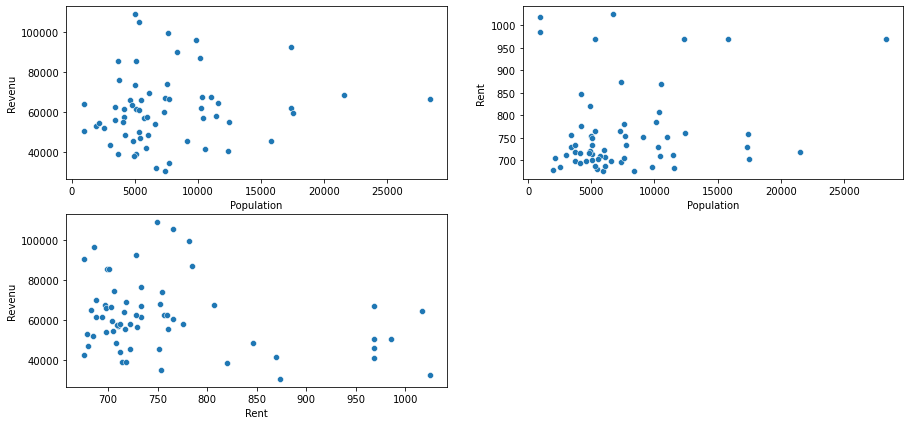

In [115]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(x=obsrent['Total Population'],y=obsrent['Average Revenu'],data=obsrent)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=obsrent['Total Population'],y=obsrent['Rent avg'],data=obsrent)
plt.xlabel('Population')
plt.ylabel('Rent')

plt.subplot(2, 2, 3)
sns.scatterplot(x=obsrent['Rent avg'],y=obsrent['Average Revenu'],data=obsrent)
plt.xlabel('Rent')
plt.ylabel('Revenu')
plt.show()

As you can see from the plot. We can cluster our data to eliminate counties with the highest Rent value to focus our dataset

In [116]:
rscaler = StandardScaler()
Xr_scaled = rscaler.fit_transform(obsrent[['Total Population','Rent avg','Average Revenu']])
Xr_scaled

array([[-7.79486079e-01, -6.71649348e-01,  1.39003253e+00],
       [-4.25593679e-01, -8.78824769e-01, -8.19723752e-01],
       [-4.96933256e-01, -5.08089805e-01, -1.27400293e+00],
       [ 9.79154751e-01,  6.57755580e-03, -3.42842888e-01],
       [ 5.15848279e-01,  2.70453618e-01,  1.47138189e+00],
       [-2.99947849e-01, -5.71332828e-01, -7.23375110e-01],
       [ 5.70555315e-01, -5.45163302e-01, -2.43254485e-01],
       [-1.12796789e+00, -8.89728738e-01, -4.79714263e-01],
       [ 4.54127520e-01, -8.13400952e-01,  2.00552851e+00],
       [-1.96745932e-01, -6.76010936e-01, -4.20788230e-01],
       [ 9.23863343e-03,  2.31199328e-01,  2.18640918e+00],
       [-5.36210103e-01, -4.20858049e-01, -9.04525092e-01],
       [-8.34593899e-01, -3.33626293e-01, -2.84491451e-01],
       [ 6.89788598e-01, -8.06542003e-02,  3.70978248e-01],
       [-4.50241904e-01,  5.23742278e-02,  2.52440850e+00],
       [ 1.60953918e-01, -9.24621441e-01,  1.66084997e+00],
       [ 9.59917112e-01,  2.27242242e+00

In [117]:
rkmeans=KMeans(n_clusters=2,random_state=2).fit(Xr_scaled)
crent = rkmeans.fit_predict(Xr_scaled)

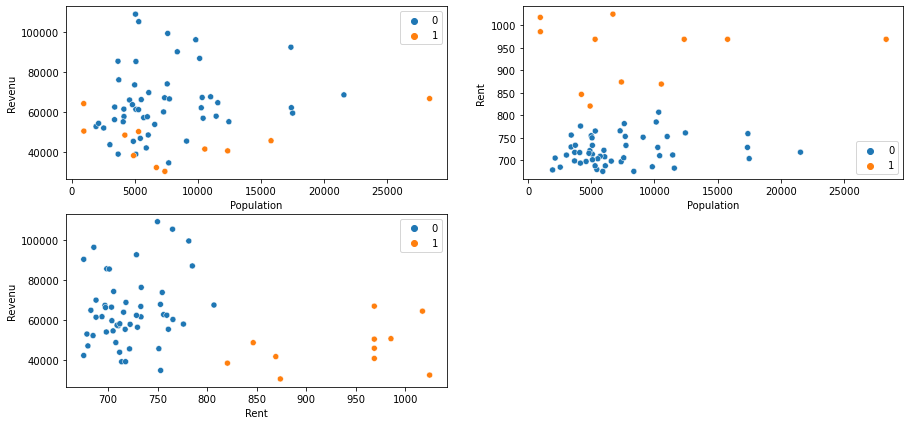

In [118]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(x=obsrent['Total Population'],y=obsrent['Average Revenu'],data=obsrent,hue=crent)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=obsrent['Total Population'],y=obsrent['Rent avg'],data=obsrent,hue=crent)
plt.xlabel('Population')
plt.ylabel('Rent')

plt.subplot(2, 2, 3)
sns.scatterplot(x=obsrent['Rent avg'],y=obsrent['Average Revenu'],data=obsrent,hue=crent)
plt.xlabel('Rent')
plt.ylabel('Revenu')
plt.show()

From the plot we see three different clusters :

    1.The first one k=0 interpretation : Cities with low rent value and high revenue on liquor consumption.
    2.The second one k=1 interpretation : Cities with high rent value and low revenu on liquor consumption.

The cluster k=0 is the best cluster to choose for our study.


In [119]:
# The cluster k=0 is the one with the lowest value
obsrent['Rent Cluster']=crent
obsrent=obsrent[obsrent['Rent Cluster']==0]
obsrent.head()

,County,Total Population,Rent avg,Average Revenu,Rent Cluster
0,ALLAMAKEE,3679.0,698.6,85495.593333,0
1,APPANOOSE,5445.0,679.6,46854.505714,0
2,BENTON,5089.0,713.6,38910.715000,0
3,BOONE,12455.0,760.8,55193.522727,0
4,BREMER,10143.0,785.0,86918.115714,0


In [120]:
obsrent.drop('Rent Cluster',axis=1,inplace=True)
nobs.drop(['Rent avg','Total Population'],axis=1,inplace=True)
nobs=nobs.join(obsrent.set_index('County'),on='County')
nobs=nobs[nobs['Rent avg'].notna()]
nobs.head()

,City,County,Total Revenu,Volume Sold (Liters),Cluster,Total Population,Rent avg,Average Revenu
10,Algona,KOSSUTH,61496.303333,13611.171667,0,6115.0,687.8,69789.579167
17,Anamosa,JONES,66271.946000,14616.334000,0,5519.0,703.4,66271.946000
27,Atlantic,CASS,53830.525000,11147.410000,0,6587.0,698.2,53830.525000
32,Bancroft,KOSSUTH,78082.855000,14203.935000,0,6115.0,687.8,69789.579167
44,Boone,BOONE,55193.522727,11533.976364,0,12455.0,760.8,55193.522727


In [121]:
nobs.drop('Average Revenu',axis=1,inplace=True)
nobs.shape

(61, 7)

In [122]:
nobs=nobs.reset_index(drop=True)
nobs.drop('Cluster',axis=1,inplace=True)
nobs.head()

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg
0,Algona,KOSSUTH,61496.303333,13611.171667,6115.0,687.8
1,Anamosa,JONES,66271.946000,14616.334000,5519.0,703.4
2,Atlantic,CASS,53830.525000,11147.410000,6587.0,698.2
3,Bancroft,KOSSUTH,78082.855000,14203.935000,6115.0,687.8
4,Boone,BOONE,55193.522727,11533.976364,12455.0,760.8


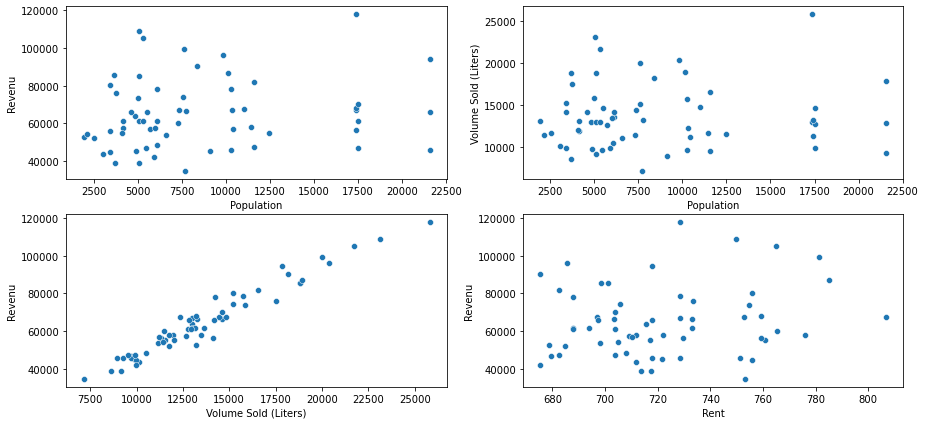

In [123]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Revenu')

plt.subplot(2, 2, 2)
sns.scatterplot(x=nobs['Total Population'],y=nobs['Volume Sold (Liters)'],data=nobs)
plt.xlabel('Population')
plt.ylabel('Volume Sold (Liters)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=nobs['Volume Sold (Liters)'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Revenu')

plt.subplot(2, 2, 4)
sns.scatterplot(x=nobs['Rent avg'],y=nobs['Total Revenu'],data=nobs)
plt.xlabel('Rent')
plt.ylabel('Revenu')
plt.show()

## Data & Methodology-3 <a name="methodology-3"></a>

In [126]:
from geopy.geocoders import Nominatim
import folium

In [127]:
lat=[]
long=[]
i=0
y=0
for n in nobs['City']:
    g=Nominatim(user_agent="foursquire_agent",timeout=30)
    
    location=g.geocode('{}, Iowa'.format(n))
    if(location!=None):
            
            lat.append(location.latitude)
            long.append(location.longitude)
    else:
            lat.append(0)
            long.append(0)
nobs['Latitude']=lat
nobs['Longitude']=long

In [130]:
nobs[['Latitude','Longitude']].isna().sum()

Latitude     0
Longitude    0
dtype: int64

In [128]:
nobs.head()

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude
0,Algona,KOSSUTH,61496.303333,13611.171667,6115.0,687.8,43.069966,-94.233019
1,Anamosa,JONES,66271.946000,14616.334000,5519.0,703.4,42.108337,-91.285159
2,Atlantic,CASS,53830.525000,11147.410000,6587.0,698.2,41.403601,-95.013878
3,Bancroft,KOSSUTH,78082.855000,14203.935000,6115.0,687.8,43.292739,-94.218019
4,Boone,BOONE,55193.522727,11533.976364,12455.0,760.8,42.017180,-93.925411


In [ ]:
# nobs.drop(['latitude','longitude'],axis=1,inplace=True)
nobs.head()

In [129]:

# Iowa State location
gg=Nominatim(user_agent="foursquire_agent",timeout=10)    
location=gg.geocode('Iowa State')
latitude=location.latitude
longitude=location.longitude

map1=folium.Map(location=[latitude,longitude],zoom_start=7)

for lat,lng,l,p,c in zip(nobs['Latitude'],nobs['Longitude'],nobs['Total Revenu'],nobs['Total Population'],nobs['City']):
    label='City: {} - Revenu: {:.2f}, Population: {}'.format(c,l,p)
    folium.CircleMarker([lat, lng], radius=5,
                    popup=label, line_color='#3186cc',
                    fill_color='#3186cc').add_to(map1)
map1

We will use the Foursquare API

In [131]:
CID=''
CSECRET=''
vv=''
category='' # This code is for our venues categories to filter better data
def todataframe(names,latitude,longitude):
    venue=[]
    r=500
    limi=100
    df=pd.DataFrame(columns=['City', 
                  'City Latitude', 
                  'City Longitude', 
                   'id',          
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])
    for n,la,lng in zip(names,latitude,longitude):
        url='http://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(
        CID,CSECRET,la,lng,vv,r,limi,category)
        result=requests.get(url).json()['response']['groups'][0]['items']
        for v in result:
            df=df.append({
            'City':n, 
            'City Latitude':la, 
            'City Longitude':lng, 
            'id':v['venue']['id'],
            'Venue': v['venue']['name'], 
            'Venue Latitude': v['venue']['location']['lat'], 
            'Venue Longitude': v['venue']['location']['lng'], 
            'Venue Category': v['venue']['categories'][0]['name']
            
        },ignore_index=True)
        
            
    return df

In [132]:
venues=todataframe(nobs['City'],nobs['Latitude'],nobs['Longitude'])
venues.head()

,City,City Latitude,City Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Algona,43.069966,-94.233019,4bac324df964a52082ea3ae3,Pep's,43.068985,-94.237120,Bar
1,Algona,43.069966,-94.233019,4bf5b5469abec9b69d8124e8,Billie Jo's Bar & Grill,43.068514,-94.237650,Bar
2,Algona,43.069966,-94.233019,52685ff5498e9cba961df12f,Locker Room Bar & Grill,43.068753,-94.234676,Sports Bar
3,Anamosa,42.108337,-91.285159,4c018e80b58376b0145e443c,Tucker's Tavern,42.108258,-91.284374,Bar
4,Anamosa,42.108337,-91.285159,504b9673e4b0a294ba3f61fa,knuckleheads,42.108112,-91.285896,Bar


In [133]:
venues['City'].nunique()

50

In [134]:
df=pd.DataFrame(venues['Venue Category'].value_counts())
df.reset_index(inplace=True)
df

,index,Venue Category
0,Bar,105
1,Brewery,12
2,Dive Bar,10
3,Nightlife Spot,7
4,Sports Bar,7
5,Wine Bar,6
6,Lounge,5
7,Pub,5
8,Social Club,2
9,American Restaurant,2


In [135]:
df.drop(index=[10,12,13,14,15,16,17,18],axis=0,inplace=True)
df

,index,Venue Category
0,Bar,105
1,Brewery,12
2,Dive Bar,10
3,Nightlife Spot,7
4,Sports Bar,7
5,Wine Bar,6
6,Lounge,5
7,Pub,5
8,Social Club,2
9,American Restaurant,2


In [136]:
venues=venues[venues['Venue Category'].isin(df['index'])]
venues.head()

,City,City Latitude,City Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Algona,43.069966,-94.233019,4bac324df964a52082ea3ae3,Pep's,43.068985,-94.237120,Bar
1,Algona,43.069966,-94.233019,4bf5b5469abec9b69d8124e8,Billie Jo's Bar & Grill,43.068514,-94.237650,Bar
2,Algona,43.069966,-94.233019,52685ff5498e9cba961df12f,Locker Room Bar & Grill,43.068753,-94.234676,Sports Bar
3,Anamosa,42.108337,-91.285159,4c018e80b58376b0145e443c,Tucker's Tavern,42.108258,-91.284374,Bar
4,Anamosa,42.108337,-91.285159,504b9673e4b0a294ba3f61fa,knuckleheads,42.108112,-91.285896,Bar


In [137]:
# one hot encoding
iowa_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
iowa_onehot['City'] = venues['City'] 

# move neighborhood column to the first column
fixed_columns = [iowa_onehot.columns[-1]] + list(iowa_onehot.columns[:-1])
iowa_onehot = iowa_onehot[fixed_columns]

iowa_onehot.head()

,City,American Restaurant,Bar,Brewery,Dive Bar,Lounge,Nightclub,Nightlife Spot,Pub,Social Club,Sports Bar,Wine Bar
0,Algona,0,1,0,0,0,0,0,0,0,0,0
1,Algona,0,1,0,0,0,0,0,0,0,0,0
2,Algona,0,0,0,0,0,0,0,0,0,1,0
3,Anamosa,0,1,0,0,0,0,0,0,0,0,0
4,Anamosa,0,1,0,0,0,0,0,0,0,0,0


In [138]:
iowa_onehot.shape

(163, 12)

## Exploring and modeling 3<a name="results-3"></a>

##### Next, let's group rows by city and by taking the mean of the frequency of occurrence of each category

In [139]:
iowa_grouped = iowa_onehot.groupby('City').mean().reset_index()
iowa_grouped.head()

,City,American Restaurant,Bar,Brewery,Dive Bar,Lounge,Nightclub,Nightlife Spot,Pub,Social Club,Sports Bar,Wine Bar
0,Algona,0.0,0.666667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
1,Anamosa,0.0,0.750000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Atlantic,0.0,1.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Centerville,0.0,0.500000,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.000000,0.0
4,Chariton,0.0,1.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [140]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [141]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
iowa_venues_sorted = pd.DataFrame(columns=columns)
iowa_venues_sorted['City'] = iowa_grouped['City']

for ind in np.arange(iowa_grouped.shape[0]):
    iowa_venues_sorted.iloc[ind, 1:] = return_most_common_venues(iowa_grouped.iloc[ind, :], num_top_venues)

iowa_venues_sorted.head(10)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Algona,Bar,Sports Bar,American Restaurant,Brewery,Dive Bar,Lounge
1,Anamosa,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
2,Atlantic,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
3,Centerville,Bar,Nightlife Spot,American Restaurant,Brewery,Dive Bar,Lounge
4,Chariton,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
5,Clarinda,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
6,Clear Lake,Bar,Brewery,American Restaurant,Dive Bar,Lounge,Nightclub
7,Creston,Bar,Nightlife Spot,Sports Bar,American Restaurant,Brewery,Dive Bar
8,DeWitt,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
9,Decorah,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub


We can devide venues categories into 4 categories

In [142]:
kclusters = 4

# run k-means clustering
kmeansv = KMeans(n_clusters=kclusters, random_state=0).fit(iowa_grouped.drop('City', axis=1))

# check cluster labels generated for each row in the dataframe
kmeansv.labels_

array([2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2,
       0, 3, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 1, 0, 1, 1])

In [143]:
# add clustering labels
iowa_venues_sorted.insert(0, 'Cluster', kmeansv.labels_)


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nnobs = nobs.join(iowa_venues_sorted.set_index('City'), on='City')

nnobs.head() # check the last columns!

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Algona,KOSSUTH,61496.303333,13611.171667,6115.0,687.8,43.069966,-94.233019,2.0,Bar,Sports Bar,American Restaurant,Brewery,Dive Bar,Lounge
1,Anamosa,JONES,66271.946000,14616.334000,5519.0,703.4,42.108337,-91.285159,2.0,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
2,Atlantic,CASS,53830.525000,11147.410000,6587.0,698.2,41.403601,-95.013878,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
3,Bancroft,KOSSUTH,78082.855000,14203.935000,6115.0,687.8,43.292739,-94.218019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boone,BOONE,55193.522727,11533.976364,12455.0,760.8,42.017180,-93.925411,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
vobs=nnobs[nnobs['Cluster'].notna()]
vobs.shape

(50, 15)

In [145]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
rainbow={0:'#943126',1:'#1A5276',2:'#1E8449',3:'#D68910'}

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vobs['Latitude'], vobs['Longitude'], vobs['City'], vobs['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's see our clusters in our dataset

Cluster k=0 :

In [146]:
k0=vobs[vobs['Cluster']==0]
k0=k0.sort_values(by=['Total Revenu'],ascending=False,kind='mergesort')
k0

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
58,Waverly,BREMER,86918.115714,18932.672857,10143.0,785.0,42.725814,-92.475463,0.0,Bar,Brewery,Pub,American Restaurant,Dive Bar,Lounge
43,Pella,MARION,68148.841667,13212.948333,17402.0,759.2,41.408053,-92.916309,0.0,Bar,Lounge,Pub,American Restaurant,Brewery,Dive Bar
51,Spencer,CLAY,67675.815556,14823.652222,11011.0,752.8,43.141358,-95.144439,0.0,Brewery,Bar,Nightlife Spot,American Restaurant,Dive Bar,Lounge
30,Jefferson,GREENE,61506.590000,13163.063333,4143.0,693.8,41.013134,-91.971864,0.0,Brewery,Nightlife Spot,American Restaurant,Bar,Dive Bar,Lounge
40,Orange City,SIOUX,61185.415000,12771.542500,17503.0,703.8,43.007242,-96.058314,0.0,Pub,American Restaurant,Bar,Brewery,Dive Bar,Lounge
35,Maquoketa,JACKSON,57664.382500,13457.307500,6004.0,722.2,42.069102,-90.665666,0.0,Bar,Brewery,Sports Bar,American Restaurant,Dive Bar,Lounge
42,Parkersburg,BUTLER,52800.110000,13182.850000,1940.0,678.6,42.574074,-92.781901,0.0,Brewery,American Restaurant,Bar,Dive Bar,Lounge,Nightclub
21,Fort Madison,LEE,45737.264444,9282.061111,21563.0,718.0,40.629940,-91.315191,0.0,Bar,Brewery,Lounge,Nightclub,American Restaurant,Dive Bar


<Figure size 432x288 with 0 Axes>

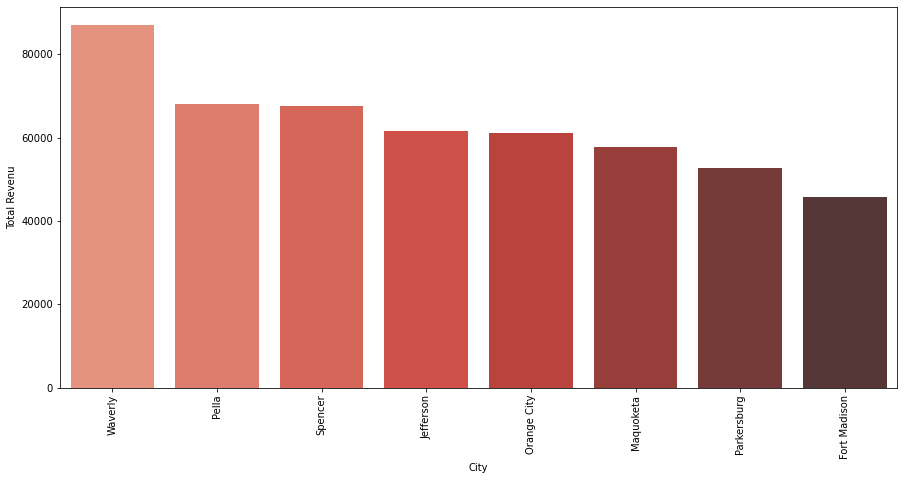

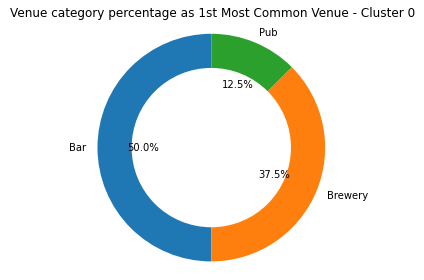

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

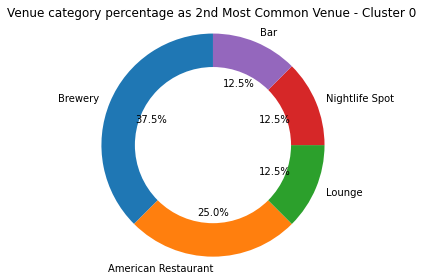

In [147]:
plt.figure(0)
plt.figure(figsize=(15, 7))
sns.barplot(x=k0['City'], y=k0['Total Revenu'], data=k0,palette="Reds_d")
plt.xticks(rotation=90)

plt.figure(1)
plt.figure(figsize=(10, 7))
p1=pd.DataFrame(k0['1st Most Common Venue'].value_counts())
p1.reset_index(inplace=True)
labels = p1['index']
sizes = p1['1st Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 1st Most Common Venue - Cluster 0')
plt.tight_layout()

plt.figure(2)
plt.figure(figsize=(10, 7))
p12=pd.DataFrame(k0['2nd Most Common Venue'].value_counts())
p12.reset_index(inplace=True)
labels = p12['index']
sizes = p12['2nd Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 2nd Most Common Venue - Cluster 0')
plt.tight_layout()

plt.show()

Cluster K=1

In [148]:
k1=vobs[vobs['Cluster']==1]
k1=k1.sort_values(by=['Total Revenu'],ascending=False,kind='mergesort')
k1

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
37,Mt Pleasant,HENRY,118010.200000,25801.320000,17368.000000,728.6,40.966312,-91.553996,1.0,Bar,Brewery,American Restaurant,Dive Bar,Lounge,Nightclub
11,Clear Lake,CERRO GORD,99421.500000,20002.755000,7614.907753,781.4,43.138092,-93.379200,1.0,Bar,Brewery,American Restaurant,Dive Bar,Lounge,Nightclub
57,Waukon,ALLAMAKEE,85495.593333,18835.633333,3679.000000,698.6,43.269421,-91.475695,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
19,Fairfield,JEFFERSON,67335.723333,12339.280000,10341.000000,806.8,41.008736,-91.962649,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
36,Mount Pleasant,HENRY,67030.414000,12998.356000,17368.000000,728.6,40.966312,-91.553996,1.0,Bar,Brewery,American Restaurant,Dive Bar,Lounge,Nightclub
60,West Point,LEE,65821.240000,12840.500000,21563.000000,718.0,40.717206,-91.451731,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
44,Red Oak,MONTGOMERY,61234.687500,12950.580000,5305.000000,687.8,41.009519,-95.228247,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
7,Chariton,LUCAS,57790.186667,11956.926667,4152.000000,776.0,41.014751,-93.307251,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
18,Estherville,EMMET,57214.975000,12680.962500,5713.000000,709.0,43.401626,-94.832764,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub
53,Storm Lake,BUENA VIST,56934.983636,11223.733636,10416.000000,710.2,42.645327,-95.199292,1.0,Bar,American Restaurant,Brewery,Dive Bar,Lounge,Nightclub


<Figure size 432x288 with 0 Axes>

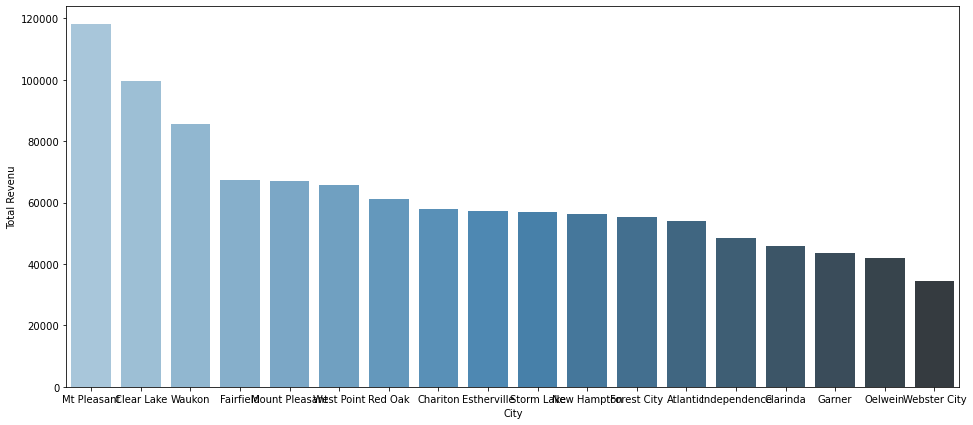

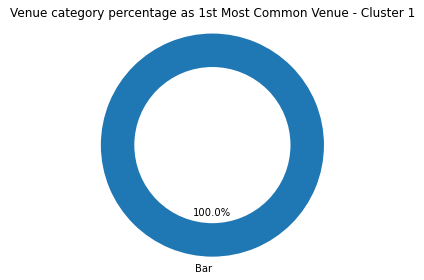

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

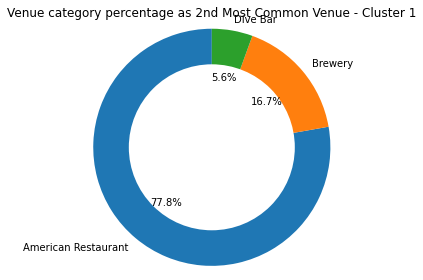

In [149]:
plt.figure(0)
plt.figure(figsize=(16,7))
sns.barplot(x=k1['City'], y=k1['Total Revenu'], data=k1,palette='Blues_d')
plt.xticks(rotation=0)

plt.figure(1)
plt.figure(figsize=(10, 7))
p2=pd.DataFrame(k1['1st Most Common Venue'].value_counts())
p2.reset_index(inplace=True)
labels = p2['index']
sizes = p2['1st Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 1st Most Common Venue - Cluster 1')
plt.tight_layout()

plt.figure(2)
plt.figure(figsize=(10, 7))
p22=pd.DataFrame(k1['2nd Most Common Venue'].value_counts())
p22.reset_index(inplace=True)
labels = p22['index']
sizes = p22['2nd Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 2nd Most Common Venue - Cluster 1')
plt.tight_layout()

plt.show()

Cluster K=2

In [150]:
k2=vobs[vobs['Cluster']==2]
k2=k2.sort_values(by=['Total Revenu'],ascending=False,kind='mergesort')
k2

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
52,Spirit Lake,DICKINSON,109086.147143,23136.514286,5064.0,749.8,43.422184,-95.102217,2.0,Bar,Pub,Wine Bar,American Restaurant,Brewery,Dive Bar
14,DeWitt,CLINTON,105331.953333,21700.106667,5322.0,765.0,41.823362,-90.538192,2.0,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
16,Denison,CRAWFORD,90231.265000,18175.123333,8372.0,675.4,42.017766,-95.355276,2.0,Bar,Nightlife Spot,American Restaurant,Brewery,Dive Bar,Lounge
48,Sheldon,OBRIEN,85367.865000,18825.350000,5099.0,701.2,43.181084,-95.856113,2.0,American Restaurant,Bar,Wine Bar,Brewery,Dive Bar,Lounge
33,Le Mars,PLYMOUTH,81998.603333,16526.420000,11579.0,682.6,42.794418,-96.165301,2.0,Bar,Nightclub,Social Club,American Restaurant,Brewery,Dive Bar
25,Holstein,IDA,80232.440000,15210.060000,3417.0,756.0,42.489153,-95.545003,2.0,Bar,Nightlife Spot,American Restaurant,Brewery,Dive Bar,Lounge
49,Shenandoah,PAGE,78476.047500,15734.125000,10269.0,728.6,40.765553,-95.372210,2.0,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
15,Decorah,WINNESHIEK,74131.801667,15180.746667,7575.0,705.6,43.304161,-91.785910,2.0,Bar,Dive Bar,American Restaurant,Brewery,Lounge,Nightclub
34,Manchester,DELAWARE,73639.380000,15840.844000,4997.0,754.6,42.484154,-91.455425,2.0,Bar,Brewery,Dive Bar,Sports Bar,American Restaurant,Lounge
50,Sioux Center,SIOUX,70219.952500,14610.382500,17503.0,703.8,43.079692,-96.175672,2.0,Bar,Nightlife Spot,American Restaurant,Brewery,Dive Bar,Lounge


<Figure size 432x288 with 0 Axes>

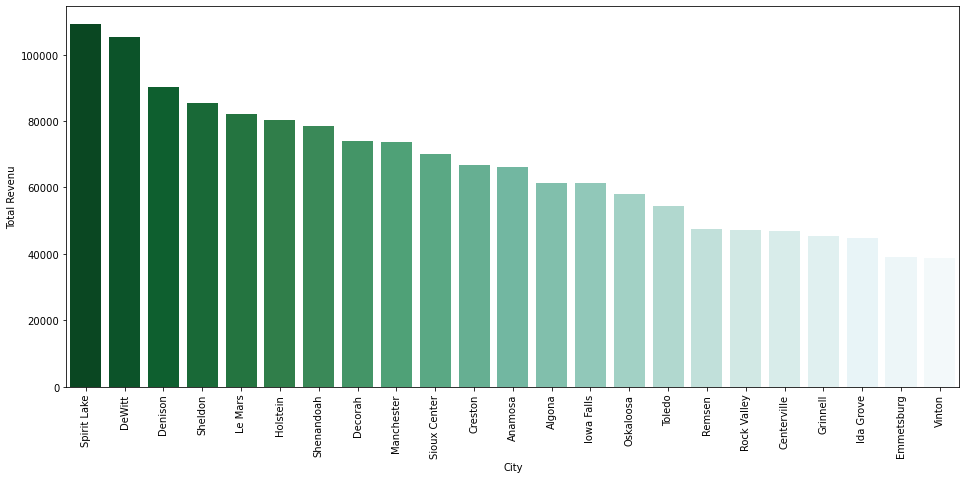

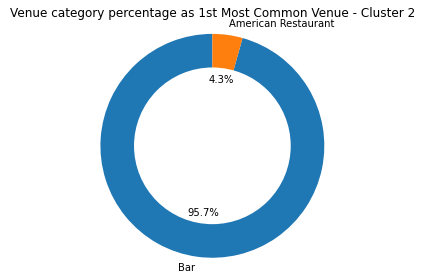

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

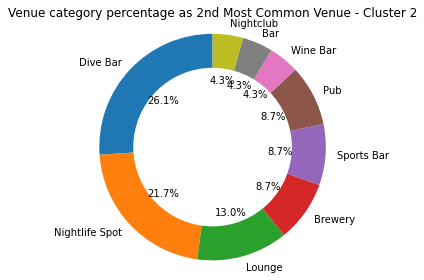

In [151]:
plt.figure(0)
plt.figure(figsize=(16,7))
sns.barplot(x=k2['City'], y=k2['Total Revenu'], data=k2,palette='BuGn_r')
plt.xticks(rotation=90)

plt.figure(1)
plt.figure(figsize=(10, 7))
p3=pd.DataFrame(k2['1st Most Common Venue'].value_counts())
p3.reset_index(inplace=True)
labels = p3['index']
sizes = p3['1st Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 1st Most Common Venue - Cluster 2')
plt.tight_layout()

plt.figure(2)
plt.figure(figsize=(10, 7))
p32=pd.DataFrame(k2['2nd Most Common Venue'].value_counts())
p32.reset_index(inplace=True)
labels = p32['index']
sizes = p32['2nd Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 2nd Most Common Venue - Cluster 2')
plt.tight_layout()


plt.show()

Cluster K=3

In [152]:
k3=vobs[vobs['Cluster']==3]
k3=k3.sort_values(by=['Total Revenu'],ascending=False,kind='mergesort')
k3

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
32,Knoxville,MARION,56301.455714,11341.32,17402.0,759.2,41.32083,-93.109371,3.0,Dive Bar,American Restaurant,Bar,Brewery,Lounge,Nightclub


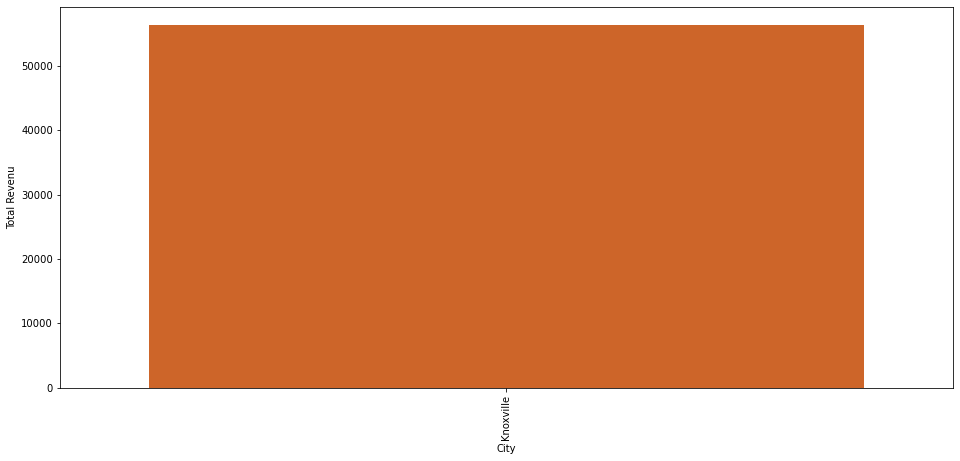

<Figure size 720x504 with 0 Axes>

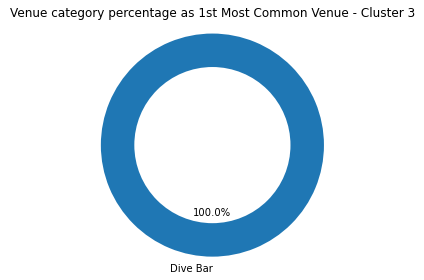

In [153]:
plt.figure(figsize=(16,7))
sns.barplot(x=k3['City'], y=k3['Total Revenu'], data=k3,palette='Oranges_d')
plt.xticks(rotation=90)

plt.figure(1)
plt.figure(figsize=(10, 7))
p4=pd.DataFrame(k3['1st Most Common Venue'].value_counts())
p4.reset_index(inplace=True)
labels = p4['index']
sizes = p4['1st Most Common Venue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Venue category percentage as 1st Most Common Venue - Cluster 3')
plt.tight_layout()


plt.show()

## Conclusion <a name="conclusion"></a>

From the plots we see that the cities in the first cluster k=0 has a higher profitability in terms of liquor consumption and different common venues on top of it, bars. 

According to the 2016 American Community Survey, 5.6% of Iowa's population were of Hispanic or Latino origin (of any race): Mexican (4.3%), Puerto Rican (0.2%), Cuban (0.1%), and other Hispanic or Latino origin (1.0%). The five largest ancestry groups were: German (35.1%), Irish (13.5%), English (8.2%), American (5.8%), and Norwegian (5.0%).

From the cluste 0 the TOP 3 cities with high revenu on the liquor consumption are :


In [154]:
k0.head(3)

,City,County,Total Revenu,Volume Sold (Liters),Total Population,Rent avg,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
58,Waverly,BREMER,86918.115714,18932.672857,10143.0,785.0,42.725814,-92.475463,0.0,Bar,Brewery,Pub,American Restaurant,Dive Bar,Lounge
43,Pella,MARION,68148.841667,13212.948333,17402.0,759.2,41.408053,-92.916309,0.0,Bar,Lounge,Pub,American Restaurant,Brewery,Dive Bar
51,Spencer,CLAY,67675.815556,14823.652222,11011.0,752.8,43.141358,-95.144439,0.0,Brewery,Bar,Nightlife Spot,American Restaurant,Dive Bar,Lounge


Waverly is Top city with highest revenu with 10143 estimated Population and a rent average of 785$.
Pubs are known as the 3rd Most Common Venue in the city.
It is the best placec to open *Maclaren's Pub*.